# 09 - a - Uranus - Feasibility Charts - Lift

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [11]:
# Create a planet object for Titan
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.h_trap = 50e3

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-ames.dat', 0 , 1 , 2, 3)

In [4]:
os.makedirs('../data/jsr-paper/uranus/')

In [14]:
vinf_kms_array = np.linspace( 0.0,   30.0,  11)
LD_array       = np.linspace( 0.0,    1.0 , 11)

In [15]:
runID = 'uranus-lift-'

num_total      = len(vinf_kms_array)*len(LD_array)
count = 1

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 +\
                          2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(LD_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(LD_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(LD_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(LD_array)))

In [16]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        overShootLimit_array[i,j],  exitflag_os_array[i,j]  = vehicle.findOverShootLimit (2400.0, 1.0, -80.0, -4.0, 1E-10, 903323.0)
        underShootLimit_array[i,j], exitflag_us_array[i,j] =  vehicle.findUnderShootLimit(2400.0, 1.0, -80.0, -4.0, 1E-10, 903323.0)

        TCW_array[i,j] = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print("Run #"+str(count)+" of "+ str(num_total)+": Arrival V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D:"+str(LD_array[j]) + " OSL: "+str(overShootLimit_array[i,j])+" USL: "+str(underShootLimit_array[i,j])+", TCW: "+str(TCW_array[i,j])+" EFOS: "+str(exitflag_os_array[i,j])+ " EFUS: "+str(exitflag_us_array[i,j]))
        count = count +1

np.savetxt('../data/jsr-paper/uranus/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'LD_array.txt',LD_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'undershootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'TCW_array.txt',TCW_array)

Run #1 of 121: Arrival V_infty: 0.0 km/s, L/D:0.0 OSL: -5.9518186230670835 USL: -5.9518186230670835, TCW: 0.0 EFOS: 1.0 EFUS: 1.0
Run #2 of 121: Arrival V_infty: 0.0 km/s, L/D:0.1 OSL: -5.9414695401719655 USL: -5.962387115538149, TCW: 0.020917575366183883 EFOS: 1.0 EFUS: 1.0
Run #3 of 121: Arrival V_infty: 0.0 km/s, L/D:0.2 OSL: -5.931397879779979 USL: -5.972964124273858, TCW: 0.04156624449387891 EFOS: 1.0 EFUS: 1.0
Run #4 of 121: Arrival V_infty: 0.0 km/s, L/D:0.30000000000000004 OSL: -5.920928650484711 USL: -5.983371379697928, TCW: 0.06244272921321681 EFOS: 1.0 EFUS: 1.0
Run #5 of 121: Arrival V_infty: 0.0 km/s, L/D:0.4 OSL: -5.911079677691305 USL: -5.994064441038063, TCW: 0.08298476334675797 EFOS: 1.0 EFUS: 1.0
Run #6 of 121: Arrival V_infty: 0.0 km/s, L/D:0.5 OSL: -5.901329300842917 USL: -6.005066008587164, TCW: 0.10373670774424681 EFOS: 1.0 EFUS: 1.0
Run #7 of 121: Arrival V_infty: 0.0 km/s, L/D:0.6000000000000001 OSL: -5.891926054246142 USL: -6.015635938994819, TCW: 0.12370988474

Run #57 of 121: Arrival V_infty: 15.0 km/s, L/D:0.1 OSL: -8.79673374034246 USL: -9.041538012465026, TCW: 0.24480427212256473 EFOS: 1.0 EFUS: 1.0
Run #58 of 121: Arrival V_infty: 15.0 km/s, L/D:0.2 OSL: -8.703786614922137 USL: -9.198762325537245, TCW: 0.49497571061510826 EFOS: 1.0 EFUS: 1.0
Run #59 of 121: Arrival V_infty: 15.0 km/s, L/D:0.30000000000000004 OSL: -8.62709877268935 USL: -9.381659216116532, TCW: 0.7545604434271809 EFOS: 1.0 EFUS: 1.0
Run #60 of 121: Arrival V_infty: 15.0 km/s, L/D:0.4 OSL: -8.563451155881921 USL: -9.591141711727687, TCW: 1.0276905558457656 EFOS: 1.0 EFUS: 1.0
Run #61 of 121: Arrival V_infty: 15.0 km/s, L/D:0.5 OSL: -8.50959468308065 USL: -9.826530304904736, TCW: 1.3169356218240864 EFOS: 1.0 EFUS: 1.0
Run #62 of 121: Arrival V_infty: 15.0 km/s, L/D:0.6000000000000001 OSL: -8.463769323909219 USL: -10.088233128819411, TCW: 1.6244638049101923 EFOS: 1.0 EFUS: 1.0
Run #63 of 121: Arrival V_infty: 15.0 km/s, L/D:0.7000000000000001 OSL: -8.424123422613775 USL: -10

Run #113 of 121: Arrival V_infty: 30.0 km/s, L/D:0.2 OSL: -10.794917572278791 USL: -12.15715901841395, TCW: 1.3622414461351582 EFOS: 1.0 EFUS: 1.0
Run #114 of 121: Arrival V_infty: 30.0 km/s, L/D:0.30000000000000004 OSL: -10.661472898362263 USL: -12.80931716941268, TCW: 2.147844271050417 EFOS: 1.0 EFUS: 1.0
Run #115 of 121: Arrival V_infty: 30.0 km/s, L/D:0.4 OSL: -10.562517329639377 USL: -13.5877179912859, TCW: 3.0252006616465223 EFOS: 1.0 EFUS: 1.0
Run #116 of 121: Arrival V_infty: 30.0 km/s, L/D:0.5 OSL: -10.48561768811851 USL: -14.475570224651165, TCW: 3.9899525365326554 EFOS: 1.0 EFUS: 1.0
Run #117 of 121: Arrival V_infty: 30.0 km/s, L/D:0.6000000000000001 OSL: -10.422583929295797 USL: -15.458632647136255, TCW: 5.036048717840458 EFOS: 1.0 EFUS: 1.0
Run #118 of 121: Arrival V_infty: 30.0 km/s, L/D:0.7000000000000001 OSL: -10.369858040721738 USL: -16.527748416399845, TCW: 6.157890375678107 EFOS: 1.0 EFUS: 1.0
Run #119 of 121: Arrival V_infty: 30.0 km/s, L/D:0.8 OSL: -10.324447614559

In [17]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(LD_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(LD_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(LD_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(LD_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(LD_array)):
        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (2400.0, 1.0, 180.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload

        vehicle=Vehicle('Apollo', 1000.0, 200.0, LD_array[j], 3.1416, 0.0, 1.00, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_us))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", L/D: "+str(LD_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))


np.savetxt('../data/jsr-paper/uranus/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/uranus/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, L/D: 0.0 G_MAX: 0.1090402582343576 QDOT_MAX: 101.2430626156118 J_MAX: 45856.024178671505 STAG. PRES: 0.002116296073824336
V_infty: 0.0 km/s, L/D: 0.1 G_MAX: 0.11037959489661121 QDOT_MAX: 101.57675104840278 J_MAX: 46030.99168536434 STAG. PRES: 0.002102274289794844
V_infty: 0.0 km/s, L/D: 0.2 G_MAX: 0.11282185446968376 QDOT_MAX: 101.91208897281038 J_MAX: 46213.35626917764 STAG. PRES: 0.002089245210272968
V_infty: 0.0 km/s, L/D: 0.30000000000000004 G_MAX: 0.11628680398778453 QDOT_MAX: 102.22426425475935 J_MAX: 46368.1151206564 STAG. PRES: 0.002074410311675287
V_infty: 0.0 km/s, L/D: 0.4 G_MAX: 0.12083903079089854 QDOT_MAX: 102.56063123661768 J_MAX: 46551.74772576325 STAG. PRES: 0.002061748382729338
V_infty: 0.0 km/s, L/D: 0.5 G_MAX: 0.12640411167607513 QDOT_MAX: 102.91399807344816 J_MAX: 46736.10276047755 STAG. PRES: 0.0020491619565642777
V_infty: 0.0 km/s, L/D: 0.6000000000000001 G_MAX: 0.1327864775022335 QDOT_MAX: 103.24808243871645 J_MAX: 46946.38157097875 STAG. PRES

V_infty: 15.0 km/s, L/D: 0.2 G_MAX: 3.601053254757068 QDOT_MAX: 708.4504259583899 J_MAX: 189696.93624279182 STAG. PRES: 0.04132099521013143
V_infty: 15.0 km/s, L/D: 0.30000000000000004 G_MAX: 4.120472552805178 QDOT_MAX: 741.2634497661662 J_MAX: 200211.8701109276 STAG. PRES: 0.03644621539745654
V_infty: 15.0 km/s, L/D: 0.4 G_MAX: 4.721465505413278 QDOT_MAX: 777.3424027023278 J_MAX: 210917.89798037635 STAG. PRES: 0.03206891494618197
V_infty: 15.0 km/s, L/D: 0.5 G_MAX: 5.425352218356713 QDOT_MAX: 810.9222286664758 J_MAX: 221619.20084743973 STAG. PRES: 0.0284783907072941
V_infty: 15.0 km/s, L/D: 0.6000000000000001 G_MAX: 6.204793465289903 QDOT_MAX: 843.678958611088 J_MAX: 232258.54264758254 STAG. PRES: 0.02548657242010007
V_infty: 15.0 km/s, L/D: 0.7000000000000001 G_MAX: 7.056565860997439 QDOT_MAX: 877.1765575725931 J_MAX: 242642.76866308512 STAG. PRES: 0.023441764773400067
V_infty: 15.0 km/s, L/D: 0.8 G_MAX: 8.039612524666202 QDOT_MAX: 909.7226953330754 J_MAX: 253144.9234617641 STAG. PRE

V_infty: 30.0 km/s, L/D: 0.4 G_MAX: 31.302413281196674 QDOT_MAX: 38555.536810910686 J_MAX: 3057156.7853474068 STAG. PRES: 0.10404412495565281
V_infty: 30.0 km/s, L/D: 0.5 G_MAX: 40.11046148648928 QDOT_MAX: 41066.52806320823 J_MAX: 3212805.222622822 STAG. PRES: 0.08962819989160854
V_infty: 30.0 km/s, L/D: 0.6000000000000001 G_MAX: 52.12785731443632 QDOT_MAX: 43369.25473110754 J_MAX: 3360056.4338141275 STAG. PRES: 0.07939632197290038
V_infty: 30.0 km/s, L/D: 0.7000000000000001 G_MAX: 66.59299773606264 QDOT_MAX: 45643.88365281003 J_MAX: 3500571.8189659617 STAG. PRES: 0.07105037966020795
V_infty: 30.0 km/s, L/D: 0.8 G_MAX: 84.19447970694604 QDOT_MAX: 47842.984418806845 J_MAX: 3633967.6277569197 STAG. PRES: 0.06424111129690452
V_infty: 30.0 km/s, L/D: 0.9 G_MAX: 105.65051299199446 QDOT_MAX: 49934.279316912325 J_MAX: 3761866.0082948273 STAG. PRES: 0.058718001901563226
V_infty: 30.0 km/s, L/D: 1.0 G_MAX: 129.6986617206044 QDOT_MAX: 51933.54834703978 J_MAX: 3881108.9365113587 STAG. PRES: 0.053

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

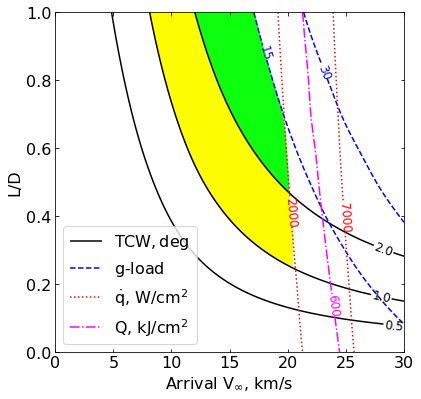

In [18]:
x = np.loadtxt('../data/jsr-paper/uranus/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/uranus/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  310)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
#S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)


Zlevels = np.array([0.5,1.0, 2.0])

Glevels = np.array([15, 30])
Qlevels = np.array([2000, 7000])
Hlevels = np.array([600])
#Slevels = np.array([0.8])


plt.figure()
#plt.rcParams["font.family"] = "Times New Roman"
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')

fig = plt.figure()
fig.set_size_inches([6.25,6.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=12, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

plt.clabel(GCS1, inline=1, fontsize=12, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=12, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='magenta',linestyles='dashdot')

plt.clabel(HCS1, inline=1, fontsize=12, colors='magenta',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')



#SCS1 = plt.contour(X, Y, transpose(S1), levels=Slevels, colors='cyan')

#plt.clabel(SCS1, inline=1, fontsize=12, colors='cyan',fmt='%.1f',inline_spacing=1)
#SCS1.collections[0].set_linewidths(3.0)
#SCS1.collections[0].set_label(r'$Peak$'+r' '+r'$stag. pressure,atm$')

#plt.axhline(y=0.36,linewidth=1, linestyle='dotted' ,color='white',label=r'$Apollo$'+' '+r'$CM$'+' '+r'$L/D$')



#matplotlib.rcParams['text.usetex'] = True
#plt.rc('text', usetex=True)


# circles for b=50 plot
#plt.plot(7.5,0.20,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.30,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)

#plt.plot(7.5,0.211,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)
#plt.plot(4.95,0.315,marker='o',mfc='none',mec='k',markersize=16,markeredgewidth=3.0)


#plt.grid(True,linestyle='dotted', linewidth=0.1)
params = {'mathtext.default': 'regular' }          
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=16)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=16)
plt.xticks( fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='lower left', fontsize=16)

dat0 = ZCS1.allsegs[2][0]
x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)

dat1 = GCS1.allsegs[0][0]
x2,y2=dat1[:,0],dat1[:,1]
F2 = interpolate.interp1d(x2, y2, kind='linear',fill_value='extrapolate', bounds_error=False)

dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[1][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,101)
y4 = F1(x4)
y4a =F1a(x4)
y5 = F2(x4)
y6 = F3(x4)

y7 = np.minimum(y5,y6)
y8 = np.minimum(y4,y6)

plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')


plt.xlim([0.0,30.0])
plt.ylim([0.0,1])

plt.savefig('../data/jsr-paper/uranus/uranus-lift-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-lift-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-lift-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


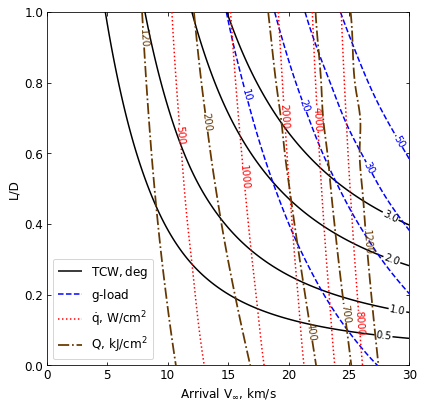

In [19]:
x = np.loadtxt('../data/jsr-paper/uranus/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/uranus/'+runID+'LD_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/uranus/'+runID+'stag_pres_atm_max_array.txt')



f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
#s1 = interpolate.interp2d(x, y, transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  310)
y_new =  np.linspace( 0.0,   1.0 ,110)
z_new =  np.zeros((len(x_new),len(y_new)))

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        #s1_new[i,j] = s1(x_new[i],y_new[j])





Z1 = z1_new

G1 = g1_new

Q1 = q1_new

#S1 = s1_new

H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)
#X, Y = meshgrid(x, y)


Zlevels = np.array([0.5,1.0,2.0,3.0])

Glevels = np.array([10.0, 20.0, 30.0, 50.0])
Qlevels = np.array([500.0, 1000.0, 2000.0, 4000.0, 8000.0])
Hlevels = np.array([120.0, 200.0, 400.0, 700.0, 1200.0])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']
#plt.xlim([0.0,30.0])
#plt.ylim([0.0,0.4])
#plt.tight_layout()
#plt.contourf(X, Y, Z, levels=levels)


#plt.axvline(x=25.0,linewidth=3, linestyle='dotted' ,color='red',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(LV$'+r' '+r'$C3$'+r' '+r'$limit)$')
#plt.axvline(x=13.1,linewidth=1, linestyle='dotted' ,color='cyan',label=r'$Max.$'+' '+r'$arrival$'+' '+r'$V_{\infty}$'+ r' ' +r'$(Chem. OI)$')


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black',zorder=0)




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1,zorder=0)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed',zorder=1)

plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0,zorder=1)



GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[3].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')


QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted',zorder=13)

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0,zorder=13)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)


QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot',zorder=14)

plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0,zorder=14)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)
HCS1.collections[4].set_linewidths(1.75)



HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel("L/D",fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(np.array([ 0.0, 5, 10, 15, 20, 25, 30]),fontsize=12)
plt.yticks(np.array([ 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]),fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='lower left', fontsize=12)



plt.savefig('../data/jsr-paper/uranus/uranus-lift-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-lift-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/uranus/uranus-lift-large.eps', dpi=300,bbox_inches='tight')



plt.show()